<a href="https://colab.research.google.com/github/AdrienVansuyt/Python-Quant-Exercices/blob/main/Pattern_x_time_unit_Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pattern x Time Unit Heatmap**

# **On BTC**

[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CL=F']: YFChartError('%ticker%: 1m data not available for startTime=1690231475 and endTime=1721767475. Only 7 days worth of 1m granularity data are allowed to be fetched per request.')
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CL=F']: YFChartError('%ticker%: 5m data not available for startTime=1690231475 and endTime=1721767475. The requested range must be within the last 60 days.')
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CL=F']: YFChartError('%ticker%: 15m data not available for startTime=1690231476 and endTime=1721767476. The requested range must be within the last 60 days.')
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CL=F']: YFChar

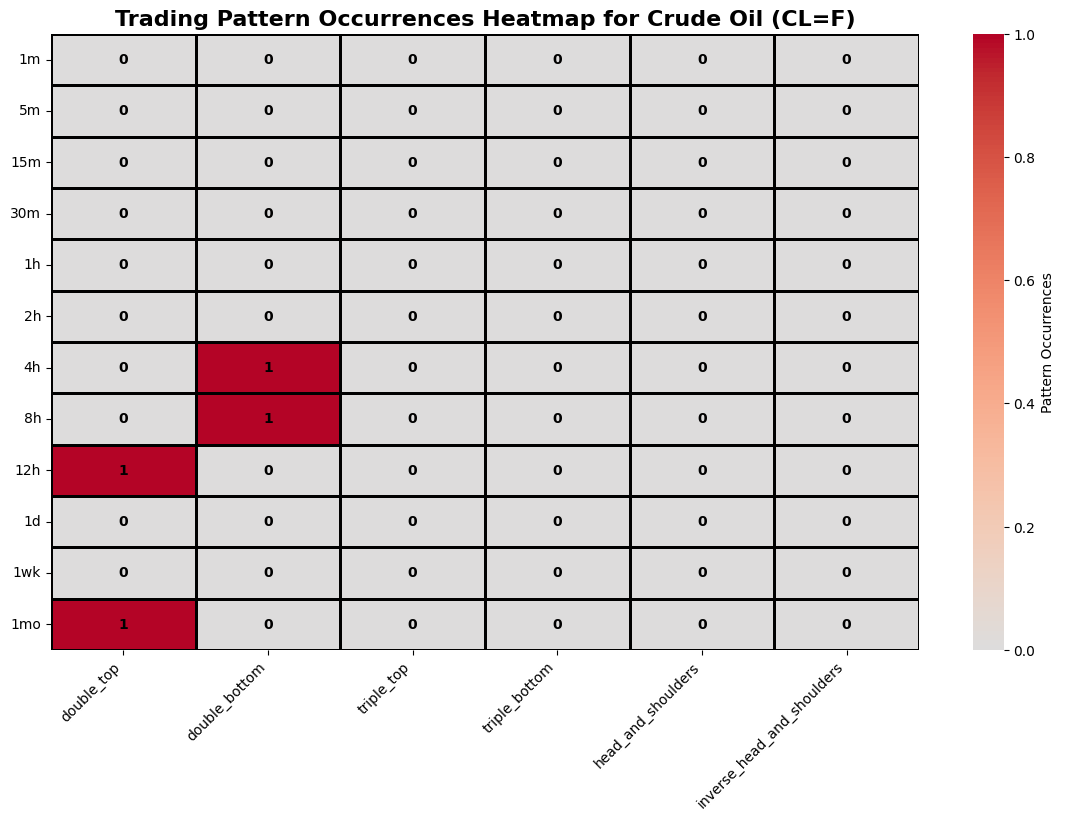

In [7]:
# Introduction:
# In this tutorial, we will create a heatmap to show the occurrences of different trading patterns (such as double top, triple top,
# head and shoulders, etc.) across various timeframes (from 1 minute to 1 month) for an asset (in this case, crude oil).
# This will help us understand how frequently these patterns occur in different timeframes.

import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# List of timeframes
timeframes = ['1m', '5m', '15m', '30m', '1h', '2h', '4h', '8h', '12h', '1d', '1wk', '1mo']

# Function to detect patterns (simplified example for double top and bottom)
def detect_patterns(data):
    patterns = {
        'double_top': 0,
        'double_bottom': 0,
        'triple_top': 0,
        'triple_bottom': 0,
        'head_and_shoulders': 0,
        'inverse_head_and_shoulders': 0
    }

    # Example pattern detection logic
    # Implement your own pattern detection logic or use a library
    # Here we use a simplified logic for the sake of example
    if len(data) < 5:
        return patterns

    close = data['Close']

    # Example logic for detecting double top and bottom
    if close[-1] < close[-2] > close[-3] < close[-4]:
        patterns['double_top'] += 1
    if close[-1] > close[-2] < close[-3] > close[-4]:
        patterns['double_bottom'] += 1

    # Add your logic for other patterns

    return patterns

# Download data for crude oil (CL=F) for each timeframe
pattern_counts = {pattern: [] for pattern in ['double_top', 'double_bottom', 'triple_top', 'triple_bottom', 'head_and_shoulders', 'inverse_head_and_shoulders']}

# Function to resample data for custom intervals
def resample_data(data, timeframe):
    if timeframe == '2h':
        return data.resample('2H').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'}).dropna()
    elif timeframe == '4h':
        return data.resample('4H').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'}).dropna()
    elif timeframe == '8h':
        return data.resample('8H').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'}).dropna()
    elif timeframe == '12h':
        return data.resample('12H').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'}).dropna()
    return data

for timeframe in timeframes:
    if timeframe in ['2h', '4h', '8h', '12h']:
        data = yf.download('CL=F', period='1mo', interval='1h')
        data = resample_data(data, timeframe)
    else:
        data = yf.download('CL=F', period='1y', interval=timeframe)

    # Ensure data is not empty
    if data.empty:
        for pattern in pattern_counts:
            pattern_counts[pattern].append(0)
        continue

    patterns = detect_patterns(data)
    for pattern, count in patterns.items():
        pattern_counts[pattern].append(count)

# Ensure all lists in pattern_counts have the same length as timeframes
for pattern in pattern_counts:
    while len(pattern_counts[pattern]) < len(timeframes):
        pattern_counts[pattern].append(0)

# Create a DataFrame with the pattern counts
pattern_df = pd.DataFrame(pattern_counts, index=timeframes)

# Create the heatmap
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(
    pattern_df,
    annot=True,
    cmap='coolwarm',
    center=0,
    cbar_kws={'label': 'Pattern Occurrences'},
    linewidths=1,
    linecolor='black',
    annot_kws={'color': 'black', 'weight': 'bold', 'size': 10}
)

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('Trading Pattern Occurrences Heatmap for Crude Oil (CL=F)', fontsize=16, weight='bold')
plt.show()

# Conclusion: By examining the trading pattern occurrences heatmap, # Introduction:
# In this tutorial, we will create a heatmap to show the occurrences of different trading patterns (such as double top, triple top,
# head and shoulders, etc.) across various timeframes (from 1 minute to 1 month) for an asset (in this case, Bitcoin).
# This will help us understand how frequently these patterns occur in different timeframes.

import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# List of timeframes
timeframes = ['1m', '5m', '15m', '30m', '1h', '2h', '4h', '8h', '12h', '1d', '1wk', '1mo']

# Function to detect patterns (simplified example for double top and bottom)
def detect_patterns(data):
    patterns = {
        'double_top': 0,
        'double_bottom': 0,
        'triple_top': 0,
        'triple_bottom': 0,
        'head_and_shoulders': 0,
        'inverse_head_and_shoulders': 0
    }

    # Example pattern detection logic
    # Implement your own pattern detection logic or use a library
    # Here we use a simplified logic for the sake of example
    if len(data) < 5:
        return patterns

    close = data['Close']

    # Example logic for detecting double top and bottom
    if close[-1] < close[-2] > close[-3] < close[-4]:
        patterns['double_top'] += 1
    if close[-1] > close[-2] < close[-3] > close[-4]:
        patterns['double_bottom'] += 1

    # Add your logic for other patterns

    return patterns

# Download data for Bitcoin (BTC-USD) for each timeframe
pattern_counts = {pattern: [] for pattern in ['double_top', 'double_bottom', 'triple_top', 'triple_bottom', 'head_and_shoulders', 'inverse_head_and_shoulders']}

# Function to resample data for custom intervals
def resample_data(data, timeframe):
    if timeframe == '2h':
        return data.resample('2H').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'}).dropna()
    elif timeframe == '4h':
        return data.resample('4H').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'}).dropna()
    elif timeframe == '8h':
        return data.resample('8H').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'}).dropna()
    elif timeframe == '12h':
        return data.resample('12H').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'}).dropna()
    return data

# Specify the start date for the analysis
start_date = '2022-08-01'

for timeframe in timeframes:
    if timeframe in ['2h', '4h', '8h', '12h']:
        data = yf.download('BTC-USD', start=start_date, interval='1h')
        data = resample_data(data, timeframe)
    else:
        data = yf.download('BTC-USD', start=start_date, interval=timeframe)

    # Ensure data is not empty
    if data.empty:
        for pattern in pattern_counts:
            pattern_counts[pattern].append(0)
        continue

    patterns = detect_patterns(data)
    for pattern, count in patterns.items():
        pattern_counts[pattern].append(count)

# Ensure all lists in pattern_counts have the same length as timeframes
for pattern in pattern_counts:
    while len(pattern_counts[pattern]) < len(timeframes):
        pattern_counts[pattern].append(0)

# Create a DataFrame with the pattern counts
pattern_df = pd.DataFrame(pattern_counts, index=timeframes)

# Create the heatmap
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(
    pattern_df,
    annot=True,
    cmap='coolwarm',
    center=0,
    cbar_kws={'label': 'Pattern Occurrences'},
    linewidths=1,
    linecolor='black',
    annot_kws={'color': 'black', 'weight': 'bold', 'size': 10}
)

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('Trading Pattern Occurrences Heatmap for Bitcoin (BTC-USD)', fontsize=16, weight='bold')
plt.show()

# Conclusion:
# By examining the trading pattern occurrences heatmap, we can identify the frequency of different trading patterns
# across various timeframes. This information can be valuable for traders and investors looking to understand market dynamics
# and make informed trading decisions.
we can identify the frequency of different trading patterns across various timeframes. This information can be valuable for traders and investors looking to understand market dynamics and make informed trading decisions.


# **Now let's try on gold**


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GC=F']: YFChartError('%ticker%: 1m data not available for startTime=1659326400 and endTime=1721767992. Only 7 days worth of 1m granularity data are allowed to be fetched per request.')
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GC=F']: YFChartError('%ticker%: 5m data not available for startTime=1659326400 and endTime=1721767995. The requested range must be within the last 60 days.')
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GC=F']: YFChartError('%ticker%: 15m data not available for startTime=1659326400 and endTime=1721767996. The requested range must be within the last 60 days.')
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GC=F']: YFChar

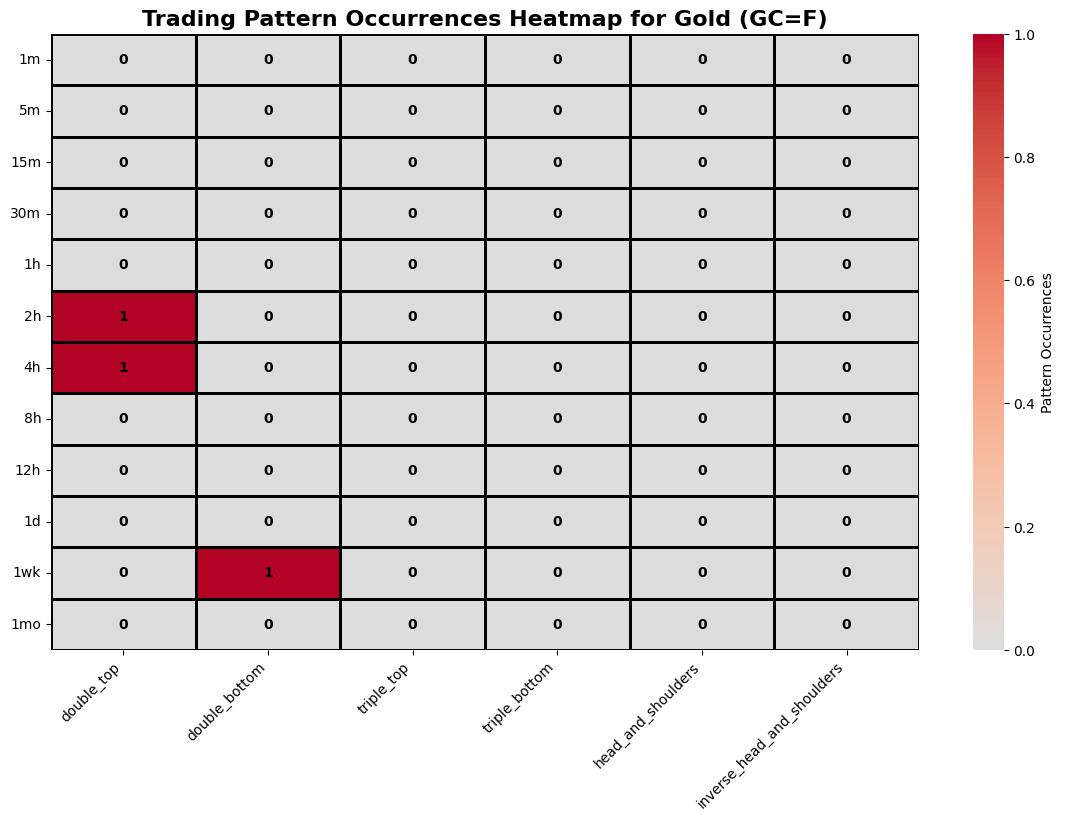

In [14]:
# Introduction:
# In this tutorial, we will create a heatmap to show the occurrences of different trading patterns (such as double top, triple top,
# head and shoulders, etc.) across various timeframes (from 1 minute to 1 month) for an asset (in this case, gold).
# This will help us understand how frequently these patterns occur in different timeframes.

import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# List of timeframes
timeframes = ['1m', '5m', '15m', '30m', '1h', '2h', '4h', '8h', '12h', '1d', '1wk', '1mo']

# Function to detect patterns (simplified example for double top and bottom)
def detect_patterns(data):
    patterns = {
        'double_top': 0,
        'double_bottom': 0,
        'triple_top': 0,
        'triple_bottom': 0,
        'head_and_shoulders': 0,
        'inverse_head_and_shoulders': 0
    }

    # Example pattern detection logic
    # Implement your own pattern detection logic or use a library
    # Here we use a simplified logic for the sake of example
    if len(data) < 5:
        return patterns

    close = data['Close']

    # Example logic for detecting double top and bottom
    if close[-1] < close[-2] > close[-3] < close[-4]:
        patterns['double_top'] += 1
    if close[-1] > close[-2] < close[-3] > close[-4]:
        patterns['double_bottom'] += 1

    # Add your logic for other patterns

    return patterns

# Download data for gold (GC=F) for each timeframe
pattern_counts = {pattern: [] for pattern in ['double_top', 'double_bottom', 'triple_top', 'triple_bottom', 'head_and_shoulders', 'inverse_head_and_shoulders']}

# Function to resample data for custom intervals
def resample_data(data, timeframe):
    if timeframe == '2h':
        return data.resample('2H').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'}).dropna()
    elif timeframe == '4h':
        return data.resample('4H').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'}).dropna()
    elif timeframe == '8h':
        return data.resample('8H').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'}).dropna()
    elif timeframe == '12h':
        return data.resample('12H').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'}).dropna()
    return data

# Specify the start date for the analysis
start_date = '2022-08-01'

for timeframe in timeframes:
    if timeframe in ['2h', '4h', '8h', '12h']:
        data = yf.download('GC=F', start=start_date, interval='1h')
        data = resample_data(data, timeframe)
    else:
        data = yf.download('GC=F', start=start_date, interval=timeframe)

    # Ensure data is not empty
    if data.empty:
        for pattern in pattern_counts:
            pattern_counts[pattern].append(0)
        continue

    patterns = detect_patterns(data)
    for pattern, count in patterns.items():
        pattern_counts[pattern].append(count)

# Ensure all lists in pattern_counts have the same length as timeframes
for pattern in pattern_counts:
    while len(pattern_counts[pattern]) < len(timeframes):
        pattern_counts[pattern].append(0)

# Create a DataFrame with the pattern counts
pattern_df = pd.DataFrame(pattern_counts, index=timeframes)

# Create the heatmap
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(
    pattern_df,
    annot=True,
    cmap='coolwarm',
    center=0,
    cbar_kws={'label': 'Pattern Occurrences'},
    linewidths=1,
    linecolor='black',
    annot_kws={'color': 'black', 'weight': 'bold', 'size': 10}
)

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('Trading Pattern Occurrences Heatmap for Gold (GC=F)', fontsize=16, weight='bold')
plt.show()

# Conclusion: By examining the trading pattern occurrences heatmap, we can identify the frequency of different trading patterns across various timeframes. This information can be valuable for traders and investors looking to understand market dynamics and make informed trading decisions.


# **On Nasdaq**

[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^IXIC']: YFChartError('%ticker%: 1m data not available for startTime=1659326400 and endTime=1721768180. Only 7 days worth of 1m granularity data are allowed to be fetched per request.')
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^IXIC']: YFChartError('%ticker%: 5m data not available for startTime=1659326400 and endTime=1721768181. The requested range must be within the last 60 days.')
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^IXIC']: YFChartError('%ticker%: 15m data not available for startTime=1659326400 and endTime=1721768182. The requested range must be within the last 60 days.')
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^IXIC']: YF

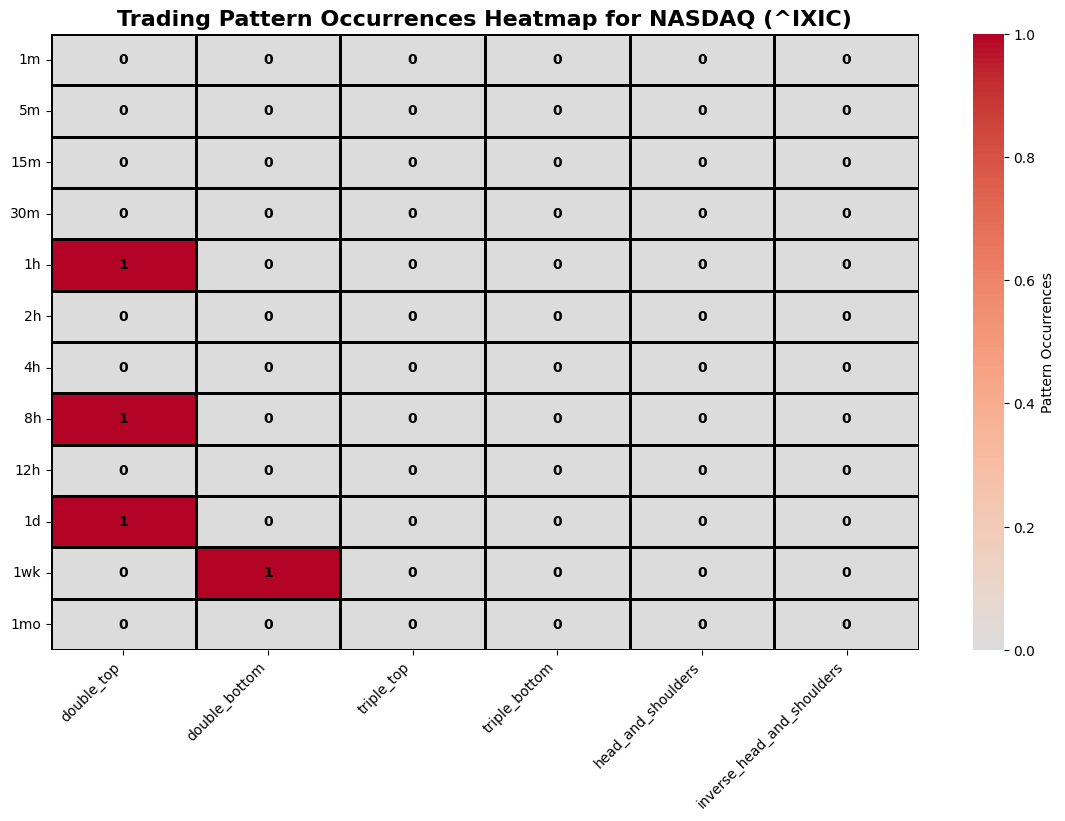

In [15]:
# Introduction:
# In this tutorial, we will create a heatmap to show the occurrences of different trading patterns (such as double top, triple top,
# head and shoulders, etc.) across various timeframes (from 1 minute to 1 month) for an asset (in this case, NASDAQ).
# This will help us understand how frequently these patterns occur in different timeframes.

import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# List of timeframes
timeframes = ['1m', '5m', '15m', '30m', '1h', '2h', '4h', '8h', '12h', '1d', '1wk', '1mo']

# Function to detect patterns (simplified example for double top and bottom)
def detect_patterns(data):
    patterns = {
        'double_top': 0,
        'double_bottom': 0,
        'triple_top': 0,
        'triple_bottom': 0,
        'head_and_shoulders': 0,
        'inverse_head_and_shoulders': 0
    }

    # Example pattern detection logic
    # Implement your own pattern detection logic or use a library
    # Here we use a simplified logic for the sake of example
    if len(data) < 5:
        return patterns

    close = data['Close']

    # Example logic for detecting double top and bottom
    if close[-1] < close[-2] > close[-3] < close[-4]:
        patterns['double_top'] += 1
    if close[-1] > close[-2] < close[-3] > close[-4]:
        patterns['double_bottom'] += 1

    # Add your logic for other patterns

    return patterns

# Download data for NASDAQ (symbol: ^IXIC) for each timeframe
pattern_counts = {pattern: [] for pattern in ['double_top', 'double_bottom', 'triple_top', 'triple_bottom', 'head_and_shoulders', 'inverse_head_and_shoulders']}

# Function to resample data for custom intervals
def resample_data(data, timeframe):
    if timeframe == '2h':
        return data.resample('2H').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'}).dropna()
    elif timeframe == '4h':
        return data.resample('4H').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'}).dropna()
    elif timeframe == '8h':
        return data.resample('8H').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'}).dropna()
    elif timeframe == '12h':
        return data.resample('12H').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'}).dropna()
    return data

# Specify the start date for the analysis
start_date = '2022-08-01'

for timeframe in timeframes:
    if timeframe in ['2h', '4h', '8h', '12h']:
        data = yf.download('^IXIC', start=start_date, interval='1h')
        data = resample_data(data, timeframe)
    else:
        data = yf.download('^IXIC', start=start_date, interval=timeframe)

    # Ensure data is not empty
    if data.empty:
        for pattern in pattern_counts:
            pattern_counts[pattern].append(0)
        continue

    patterns = detect_patterns(data)
    for pattern, count in patterns.items():
        pattern_counts[pattern].append(count)

# Ensure all lists in pattern_counts have the same length as timeframes
for pattern in pattern_counts:
    while len(pattern_counts[pattern]) < len(timeframes):
        pattern_counts[pattern].append(0)

# Create a DataFrame with the pattern counts
pattern_df = pd.DataFrame(pattern_counts, index=timeframes)

# Create the heatmap
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(
    pattern_df,
    annot=True,
    cmap='coolwarm',
    center=0,
    cbar_kws={'label': 'Pattern Occurrences'},
    linewidths=1,
    linecolor='black',
    annot_kws={'color': 'black', 'weight': 'bold', 'size': 10}
)

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('Trading Pattern Occurrences Heatmap for NASDAQ (^IXIC)', fontsize=16, weight='bold')
plt.show()

# Conclusion:
# By examining the trading pattern occurrences heatmap, we can identify the frequency of different trading patterns
# across various timeframes. This information can be valuable for traders and investors looking to understand market dynamics
# and make informed trading decisions.
